In [ ]:
# Data Processing
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.model_selection import KFold
from scipy.stats import randint
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("directory_to_the_csv_file", index_col=0)

In [ ]:
df.iloc[0:5,0:5]

,AAK1,AASS,AATK,ABAT,ABCA1
GSM338860,6.170397,5.606532,8.186989,7.100655,4.965535
GSM338861,6.112532,5.407005,8.530366,7.131207,4.912667
GSM338863,6.164055,5.518116,7.642412,7.221282,4.962869
GSM338865,6.423721,5.650853,8.372038,7.381892,4.956469
GSM338866,6.631895,5.701830,7.903833,7.641011,4.991327


### Split df to X and Class to y

In [ ]:
# Separate features and target
X = df.drop(columns = ['Class'])
y = df['Class']

## Feature Selection: Mutual Information

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

In [ ]:
# Compute mutual information
mi = mutual_info_classif(X, y, random_state=42)

# Create a DataFrame for better visualization
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)
print(mi_df)

       Feature  Mutual Information
801      FOXG1            0.509560
1185      KLK8            0.503506
857        GDA            0.435089
1801     PTPN5            0.434184
1829    RAB40B            0.398203
...        ...                 ...
895      GNAI2            0.000000
1741  PPP1R14C            0.000000
909      GPM6A            0.000000
937      GRIK1            0.000000
1114     ITSN1            0.000000

[2525 rows x 2 columns]


In [ ]:
# Select top k features based on mutual information
k = 100  # Choose the number of top features you want
selector = SelectKBest(mutual_info_classif, k=k)
X_selected = selector.fit_transform(X, y)

### 80/20 Rule

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

### Baseline Model

In [ ]:
# Initial RF model
rf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, rf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9041095890410958


In [ ]:
def evaluate_model(n_estimators, max_depth, min_samples_split):
    rf = RandomForestClassifier(n_estimators=n_estimators,
                                max_depth=max_depth,
                                min_samples_split=min_samples_split,
                                random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_train)
    return accuracy_score(y_train, y_pred)

# Define parameter ranges
n_estimators_range = [100, 200, 300]
max_depth_range = [10, 20, 30]
min_samples_split_range = [2, 5, 10]

best_score = 0
best_params = {}

for n_estimators in n_estimators_range:
    for max_depth in max_depth_range:
        for min_samples_split in min_samples_split_range:
            score = evaluate_model(n_estimators, max_depth, min_samples_split)
            if score > best_score:
                best_score = score
                best_params = {'n_estimators': n_estimators,
                               'max_depth': max_depth,
                               'min_samples_split': min_samples_split}

print("Best parameters:", best_params)

Best parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 2}


In [ ]:
# Optimal RF model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split = 2, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)

# Calculate training accuracy
train_accuracy = accuracy_score(y_train, rf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 0.9178082191780822


### Feature Importance by Mean Decrease Gini

Training Accuracy: 1.0
Test Accuracy: 0.9178082191780822

Feature Importance Ranking (Mean Decrease in Gini Impurity):
1. feature_31: 0.0501
2. feature_93: 0.0344
3. feature_54: 0.0324
4. feature_49: 0.0321
5. feature_33: 0.0292
6. feature_98: 0.0291
7. feature_88: 0.0215
8. feature_52: 0.0193
9. feature_29: 0.0190
10. feature_84: 0.0187
11. feature_55: 0.0176
12. feature_79: 0.0167
13. feature_22: 0.0162
14. feature_6: 0.0159
15. feature_64: 0.0154
16. feature_56: 0.0152
17. feature_80: 0.0145
18. feature_92: 0.0137
19. feature_41: 0.0135
20. feature_83: 0.0133
21. feature_42: 0.0129
22. feature_30: 0.0126
23. feature_11: 0.0123
24. feature_32: 0.0123
25. feature_65: 0.0121
26. feature_87: 0.0121
27. feature_20: 0.0112
28. feature_95: 0.0111
29. feature_75: 0.0108
30. feature_70: 0.0107
31. feature_62: 0.0104
32. feature_10: 0.0103
33. feature_53: 0.0101
34. feature_27: 0.0098
35. feature_46: 0.0097
36. feature_57: 0.0097
37. feature_97: 0.0094
38. feature_63: 0.0091
39. feature_1: 0.

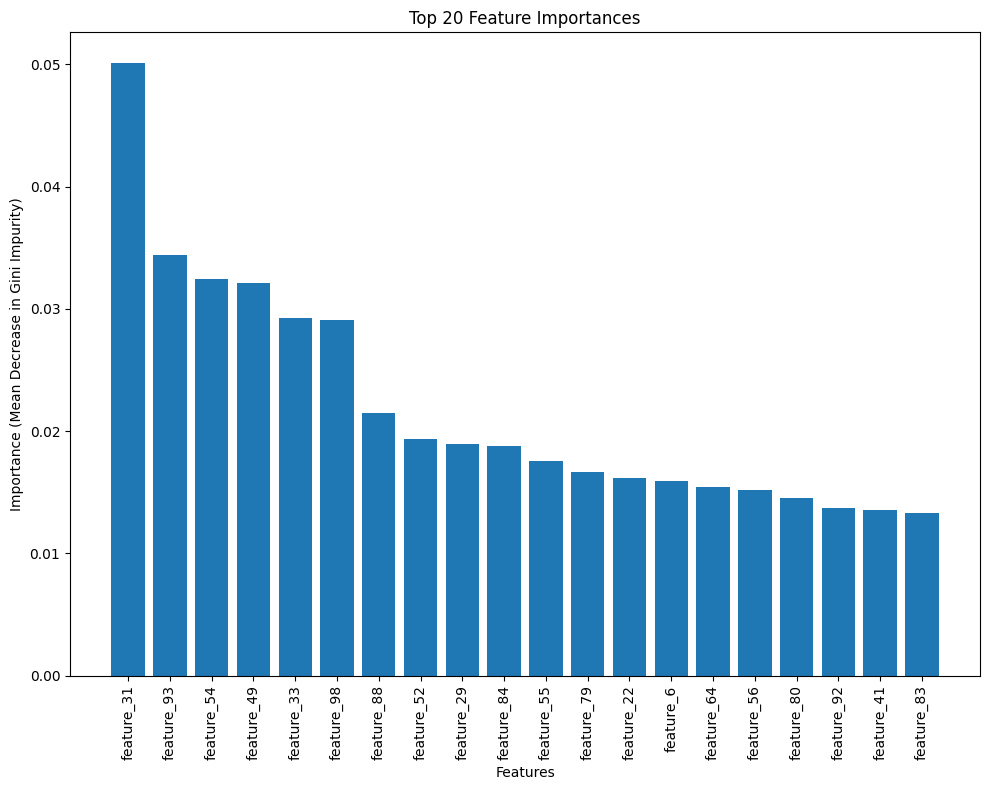

Verifying top features from Random Forest:
1. feature_31 (importance: 0.0501) corresponds to column: ADA
2. feature_93 (importance: 0.0344) corresponds to column: ANKRD1
3. feature_54 (importance: 0.0324) corresponds to column: ADRB1
4. feature_49 (importance: 0.0321) corresponds to column: ADHFE1
5. feature_33 (importance: 0.0292) corresponds to column: ADAM17
6. feature_98 (importance: 0.0291) corresponds to column: ANP32B
7. feature_88 (importance: 0.0215) corresponds to column: ANGPT4
8. feature_52 (importance: 0.0193) corresponds to column: ADORA1
9. feature_29 (importance: 0.0190) corresponds to column: ACVR1C
10. feature_84 (importance: 0.0187) corresponds to column: AMN

First few rows of top features:
                ADA    ANKRD1     ADRB1    ADHFE1    ADAM17
GSM338860  4.071704  3.863129  5.189857  6.585765  5.733042
GSM338861  3.887981  3.577248  5.591965  6.702675  5.928249
GSM338863  3.900598  3.650570  4.678470  7.062642  6.026639
GSM338865  4.186540  3.661170  5.623596 

In [ ]:
# Train the RF model
rf = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred = rf.predict(X_test)

# Calculate training and test accuracy
train_accuracy = accuracy_score(y_train, rf.predict(X_train))
test_accuracy = accuracy_score(y_test, y_pred)
print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Get feature importances
importances = rf.feature_importances_

# Create feature names (since X_train is a numpy array)
feature_names = [f"feature_{i}" for i in range(X_train.shape[1])]

# Create a DataFrame of feature importances
feature_importance_df = pd.DataFrame({
    'feature': feature_names,
    'importance': importances
})

# Sort features by importance in descending order
feature_importance_df = feature_importance_df.sort_values('importance', ascending=False).reset_index(drop=True)

# Print the feature importance ranking
print("\nFeature Importance Ranking (Mean Decrease in Gini Impurity):")
for i, row in feature_importance_df.iterrows():
    print(f"{i+1}. {row['feature']}: {row['importance']:.4f}")

# Optionally, plot the top N features
import matplotlib.pyplot as plt

def plot_feature_importance(importance_df, top_n=20):
    plt.figure(figsize=(10, 8))
    plt.bar(importance_df['feature'][:top_n], importance_df['importance'][:top_n])
    plt.title(f'Top {top_n} Feature Importances')
    plt.xlabel('Features')
    plt.ylabel('Importance (Mean Decrease in Gini Impurity)')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

plot_feature_importance(feature_importance_df)

def verify_rf_features(feature_importance_df, df, top_n=10):
    print("Verifying top features from Random Forest:")
    for rank, (index, row) in enumerate(feature_importance_df.iterrows(), 1):
        if rank > top_n:
            break
        feature = row['feature']
        importance = row['importance']
        feature_number = int(feature.split('_')[1])  # Extract number from 'feature_X'
        if feature_number < len(df.columns):
            original_column_name = df.columns[feature_number]
            print(f"{rank}. {feature} (importance: {importance:.4f}) corresponds to column: {original_column_name}")
        else:
            print(f"{rank}. {feature} (importance: {importance:.4f}) - No corresponding column found")

def display_top_rf_features(feature_importance_df, df, top_n=5):
    top_feature_numbers = [int(feature.split('_')[1]) for feature in feature_importance_df['feature'][:top_n]]
    top_columns = df.columns[top_feature_numbers]
    print("\nFirst few rows of top features:")
    print(df[top_columns].head())

# Assuming feature_importance_df is your result from the Random Forest feature importance calculation
verify_rf_features(feature_importance_df, df)
display_top_rf_features(feature_importance_df, df)

### Confusion Matrix

In [ ]:
unique_labels = y.unique()
print(unique_labels)

['OPNA' 'TBI' 'EEV']


In [ ]:
# Define the class names based on the identified mapping
class_names = ['OPNA', 'TBI', 'EEV']

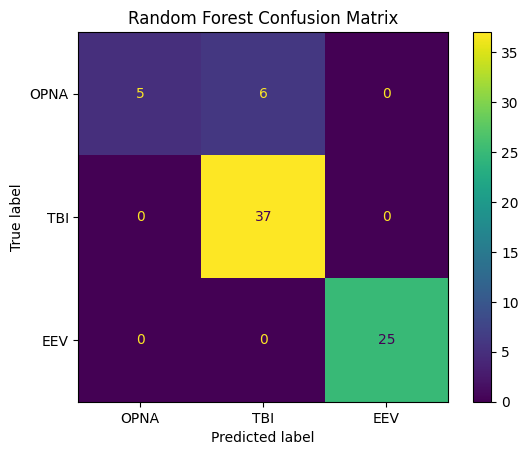

In [ ]:
# Generate confusion matrix
cm_rf = confusion_matrix(y_test, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=class_names)
disp_rf.plot(cmap=plt.cm.viridis)  # You can change the colormap if you prefer
plt.title("Random Forest Confusion Matrix")
plt.show()

### Top 100 Features

In [ ]:
# Select the top 100 features based on mutual information
top_100_features = mi_df['Feature'].head(100)
top_100_features_df = X[top_100_features]

for column in top_100_features_df.columns:
    print(column)

FOXG1
KLK8
GDA
PTPN5
RAB40B
KLRD1
LHX2
SFMBT2
KLF16
GCLM
IL12B
BCL11B
B3GNT5
OXNAD1
SHOX2
MAS1
MEIS1
FGL2
SLC25A23
DLX5
KCNE2
ABR
DPYSL4
ARX
TFPI2
DMP1
CD28
SOSTDC1
ICAM5
CHST1
SHF
MMP24
IFIT1
CD86
CST6
NETO1
HES5
SNX15
TTR
GRIN2C
SNCA
GIMAP4
ITPR1
PDE2A
DBN1
AKAP12
SDC1
PTK2B
ENC1
ACSL5
EPHA4
KCNA4
TBR1
HEBP1
EPHA6
CEBPD
RGS14
EN2
SAT1
BASP1
MYO5B
LMO7
PDE1A
DAB2IP
SOCS3
COMP
KL
CADPS2
FOSL2
FEZF2
ITGBL1
MICAL1
FOLR1
PFN2
PKP2
CX3CL1
ITPKA
MAL2
NEK6
KCTD4
NPY1R
MYC
RASL10A
LIG1
IL16
SOX4
PCDH8
TRPC4
INPP1
PRC1
PARD6A
CHRNA6
CHRNA5
CPE
VIP
KCNJ4
ILF3
MAB21L2
SELL
IL6
